# 1. Importação de bibliotecas

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 

from time import time

from random import randint

from scipy import stats


# 2. PREPROCESSAMENTO DAS IMAGENS, transformando em escala de cinza utilizando a função rgb2gray

Using Gray Scale Segmentation .............
files in directory:  ./faces 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branco02.jpg', 'senhor_branco

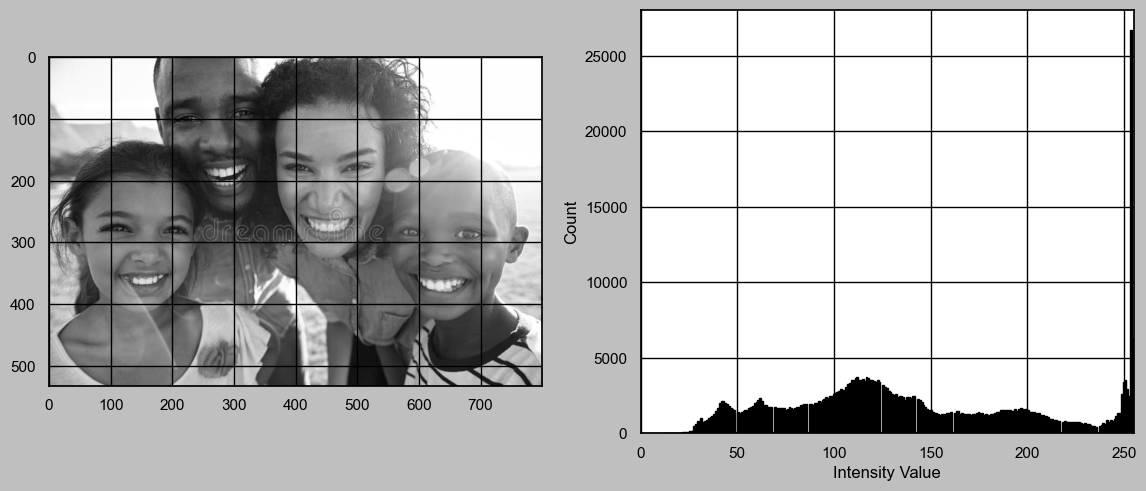


Imagem # 2 : homem_branco01.jpg
resolução da imagem:  (532, 426, 3)


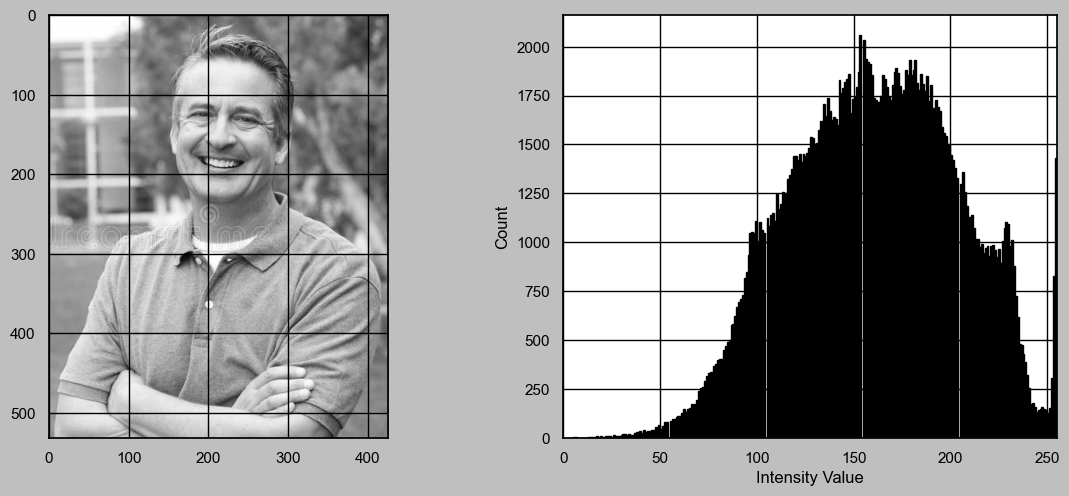


Imagem # 3 : homem_branco02.jpg
resolução da imagem:  (504, 652, 3)


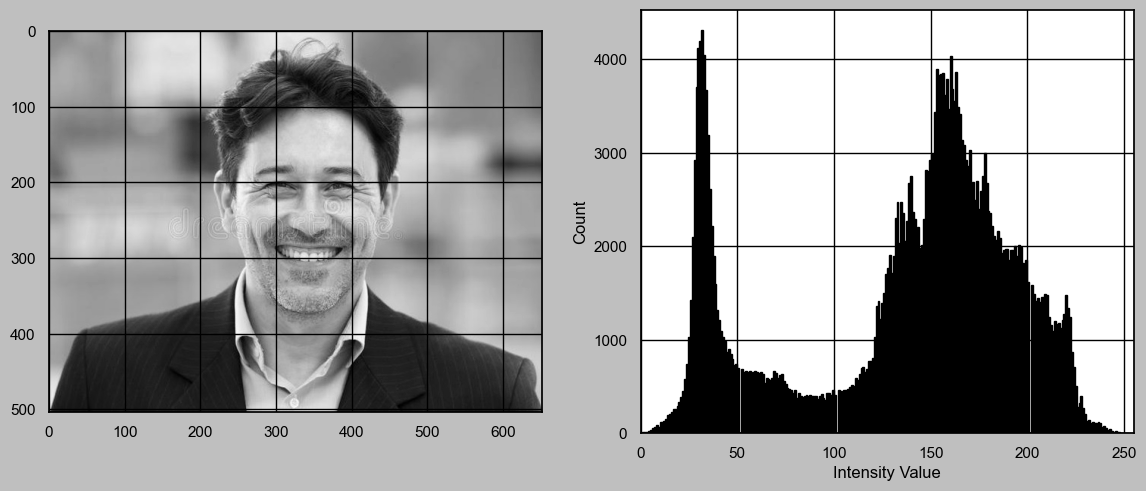


Imagem # 4 : homem_branco03.jpg
resolução da imagem:  (525, 602, 3)


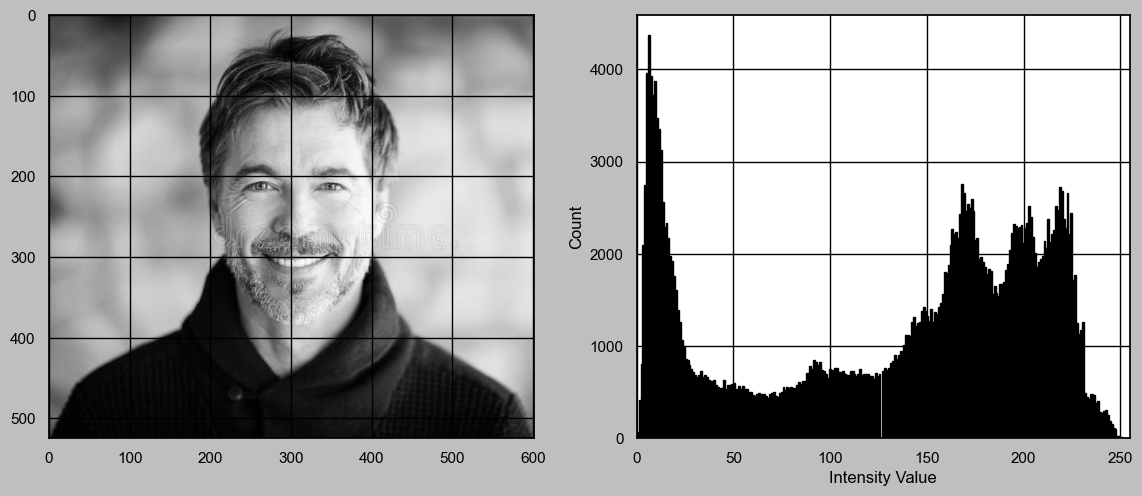


Imagem # 5 : homem_branco04.jpg
resolução da imagem:  (558, 404, 3)


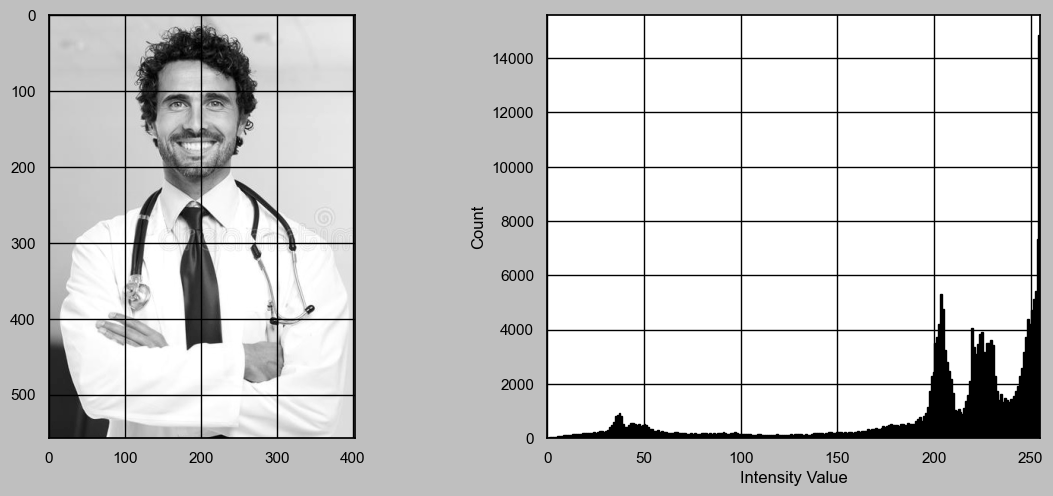


Imagem # 6 : homem_moreno01.jpg
resolução da imagem:  (534, 585, 3)


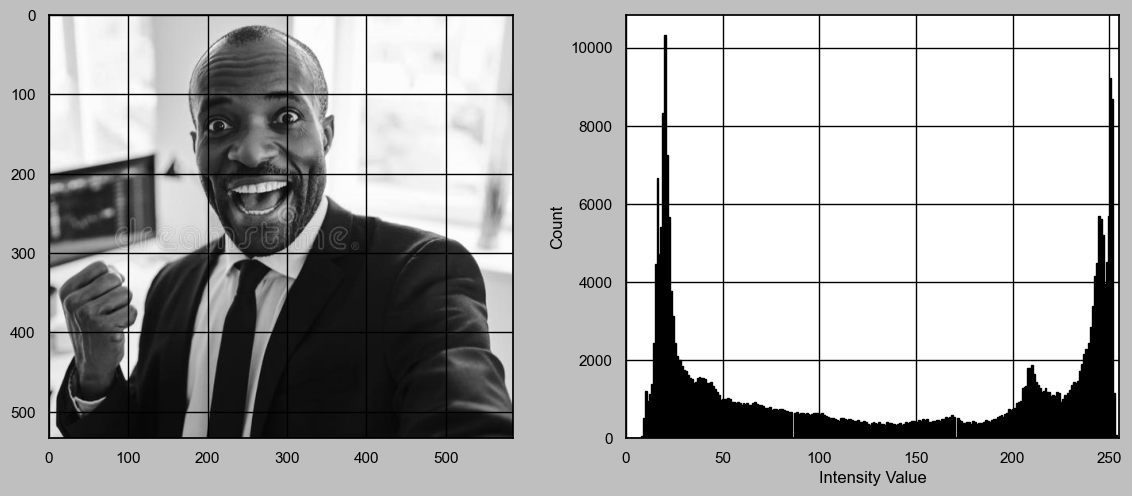

In [2]:
as_gray = True #True  #False #True para trabalhar com imagens em escala de cinza

if as_gray:
    print("Using Gray Scale Segmentation .............")

#contagem e verificação das imagens
    
INPUT_PATH = './faces'
#INPUT_PATH = 'D:\\Users\\diego\\Google Drive\\AUNEB\\ADocencia\\EP\\datasets\\faces'


Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 6
ini_img = 6
fim_img = 12
print("\nSelecionadas as imgs de", ini_img, "até", fim_img)
ctr = 1
for filename in Files[ini_img:fim_img]:
    
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img) # backup of original images
            
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            if not as_gray: 
                fig2, ax2 = plt.subplots(1,3, figsize=(20, 5.5))
                ax2[0].imshow(img[-1])
                if ncolors[-1]>1:
                    ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
                    ax2[1].legend(['Total'])
                    ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
                    ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
                    ax2[1].set_xlim(0, 255)
                    ax2[1].set_xlabel('Intensity Value')
                    ax2[1].set_ylabel('Count')
                    ax2[2].set_xlim(0, 255)
                    ax2[2].set_xlabel('Intensity Value')
                    ax2[2].set_ylabel('Count')
                plt.show()
            else: # to work with gray images
                plt.style.use('grayscale')
                if ncolors[-1]>1: # if it is RGB convert to grayscale
                    img[-1]=np.round(255*rgb2gray(img[-1]))
                ncolors[-1]=1
                fig2, ax2 = plt.subplots(1,2, figsize=(14, 5.5))
                ax2[0].imshow(img[-1])
                ax2[1].hist(img[-1].ravel(), bins = 256)   
                ax2[1].set_xlim(0, 255)
                ax2[1].set_xlabel('Intensity Value')
                ax2[1].set_ylabel('Count')
                plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)


# 3. Transformando imagens em vetores e geração de cores para representar cada cluster

In [3]:


Images=[]

for my_img in range(nImg):

    image=img[my_img]

    ch=[] # color channel vectors 

    for c in range(ncolors[my_img]):
        if ncolors[my_img]>1:
            ch.append(image[:,:,c].flatten()) 
        else:
            ch.append(image.flatten())
    print(ch)
    Images.append(np.array(ch))

[array([220., 220., 220., ..., 171., 178., 182.])]
[array([255., 255., 255., ..., 136., 138., 138.])]
[array([142., 142., 141., ...,  81.,  85., 110.])]
[array([ 67.,  67.,  68., ...,  79.,  89., 100.])]
[array([204., 204., 204., ..., 219., 219., 219.])]
[array([253., 253., 252., ...,  41.,  40.,  38.])]


In [4]:
my_color = []
my_color.append('#%06X' % 0)
my_color.append('#%06X' % 0xFFFFFF)
for i in range(20):
    my_color.append('#%06X' % randint(0, 0xFFFFFF))

# 4. Função K-means e classe para guardar os dados de execução de cada imagem para cada K (2,3,4) clusters e contagem de primitivas

In [5]:
#K-means

def kmeans(image, K, ncolors, n, maxiter):
    tempo_inicio = time()

    cc = np.zeros((ncolors,K), dtype=int) # vetor (matriz) de centroides

    classe = [-1 for i in range(n)] # inicializa o vetor de classificação de cada n da img. Todos com -1 inicialmente

    # DIEGO
    # inicialização não-randomica dos centroides
    if ncolors > 1:
        cluster_size = []
        for c in range(ncolors):
            cluster_size.append(int((np.max(image[c])-np.min(image[c]))/K))
            cc[c,0] = int(cluster_size[-1]/2)
            for k in range(1,K):
                cc[c,k] = cc[c,k-1] + cluster_size[-1]
    else:    
        cluster_size = int((np.max(image)-np.min(image))/K)
        cc[0,0] = int(cluster_size/2)
        for k in range(1,K):
            cc[0,k] = cc[0,k-1] + cluster_size

#     min_cinza = min(np.array(image).ravel())
#     max_cinza = max(np.array(image).ravel())
#     S = (max_cinza - min_cinza) / K
#     bg = [0]*K
#     ed = [0]*K
#     for k in range(K):
#         if k == 0:
#             bg[k] = min_cinza
#             ed[k] = min_cinza + S
#         else:
#             bg[k] = ed[k-1] + 1
#             ed[k] = ed[k-1] + S
#         for c in range(ncolors):
#             cc[c,k] = int( (ed[k] + bg[k]) / 2 )

    INIT_TIME = time() - tempo_inicio

    tempo_inicio = time()

    #Processo iterativo
    iteracoes = 0                                                    
    while True:                                                      
        iteracoes += 1

        if iteracoes > maxiter:
            print("O número máximo de iterações (", maxiter,") foi excedido!")
            break

        mudanca = 0                                                     #foca = [0, 0, 0, 1]

        for i in range(n):    # varrendo os pixels                      #foca = [0, n, n, n + 2]
            d_minima = 1e30                                             #foca = n * [0 , 0, 0, 1] -> [0, 0, 0, n]
            k_mais_prox = -1                                            #foca = n * [0, 0, 0, 1] -> [0, 0, 0, n]

            for k in range(K):   # varrendo clusters                    #foca = n * [0, k, k, k + 2] -> [0, kn, kn, kn + 2n]
                d = 0                                                   #foca = k * n * [0, 0, 0, 1] -> [0, 0, 0, kn]
                
                                                                        #c = 1 SEMPRE por conta do rgb2gray
                for c in range(ncolors):                                #foca = k * n * [0, c, c, c + 2] -> [0, kn, kn, 3kn]
                    dist = image[c][i] - cc[c][k]                       #foca = c * k * n * [0, 1, 0, 7] -> [0, kn, 0, 7kn]
                    if dist < 0:                                        #foca = c * k * n * [0, 0, 1, 1] -> [0, 0, kn, kn]
                        dist = dist * -1                                #foca = c * k * n * [0, 1, 0, 2] -> [0, kn, 0, 2kn]
                    d += dist                                           #foca = c * k * n * [0, 1, 0, 3] -> [0, kn, 0, 3kn]

                if d < d_minima:                                        #foca = k * n * [0, 0, 1, 2] -> [0, 0, kn, 2kn]
                    d_minima = d                                        #foca = k * n * [0, 0, 0, 2] -> [0, 0, 0, 2kn]
                    k_mais_prox = k                                     #foca = k * n * [0, 0, 0, 2] -> [0, 0, 0, 2kn]

            if classe[i] != k_mais_prox:                                #foca = n * [0, 0, 1, 3] -> [0, 0, n, 3n]
                # define a qual cluster aquele pixel pertence
                classe[i] = k_mais_prox                                 #foca = n * [0, 0, 0, 3] -> [0, 0, 0, 3n]
                mudanca += 1                                            #foca = n * [0, 1, 0, 2] -> [0, n, 0, 2n]
        #DIEGO
        #print("ITERAÇÃO: ",iteracoes," MUDANÇAS:",mudanca)
        
        if mudanca == 0:                                                #foca = [0, 0, 1, 1]
            ITER_TIME = (time() - tempo_inicio)/iteracoes #DIEGO
            #print("TERMINEI - TEMPO MÉDIO POR ITERAÇÃO: ",ITER_TIME)
            break
        else:   # calculando novos centroides
            cluster_sz = [0 for k in range(K)]                          #foca = [0, k, k, 2k + 2]
            for i in range(n):                                          #foca = [0, n, n, n + 2]
                for c in range(ncolors):                                #foca = n * [0, c, c, c + 2] -> [0, n, n, 3n]
                    cc[c][classe[i]] += image[c][i]                     #foca = c * n * [0, 1, 0, 11] -> [0, n, 0, 11n]
                    cluster_sz[classe[i]] += 1                          #foca = c * n * [0, 1, 0, 6] -> [0, n, 0, 6n]

            for k in range(K):                                          #foca = [0, k, k, k + 2]
                if cluster_sz[k]>0:                                     #foca = k * [0, 0, 1, 2]  -> [0, 0, k, 2k]
                    for c in range(ncolors):                            #foca = k * [0, c, c, c + 2] -> [0, k, k, 3k]
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])          #foca = c * k * [0, 1, 0, 8] -> [0, k, 0, 8k]
                else: # caso um cluster fique sem nenhum ponto
                    print("Cluster", k,"sem pontos... Reinicializando o algortimo") 
                    iteracoes = 0
                    for k in range(K):
                        p = randint(0,n-1) # pega um ponto qualquer
                        for c in range(ncolors):
                            cc[c,k] = image[c,p]

    return ITER_TIME, iteracoes, classe, cc                             #FOCA_iteracao = [0, 5kn + 4k + 6n, 4kn + 4k + 4n + 1, 24kn + 16k + 34n + 10]

In [6]:
class Image_per_cluster:
    def __init__(self, n, k, t, var, iterations):
        self.n = n
        self.k = k
        self.t = t
        self.var = var
        self.iterations = iterations

    def __repr__(self):
        return str(self)

# 5. Experimentos: 10 repetições para cada imagem para cada K (2,3,4) clusters, guardando os dados e plotando os resultados de máscara



IMAGEM NÚMERO 1 :


Número de clusters: 2 
Tamanho da imagem: 426400 
Tempo médio por iteração (std): 0.6840618848800659 ( 0.0027100527675028917 )
Variabilidade: 0.0039617070142389755 
Iterações (std): 8.0 ( 0.0 )
Cluster 0 limites 12.0 : 156.0
Cluster 1 limites 157.0 : 255.0


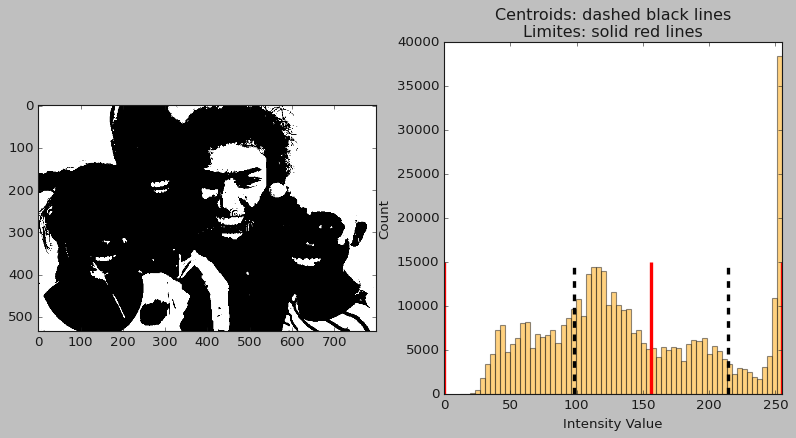

Número de clusters: 3 
Tamanho da imagem: 426400 
Tempo médio por iteração (std): 0.8945454915364582 ( 0.004156858203756218 )
Variabilidade: 0.0046468941413101966 
Iterações (std): 9.0 ( 0.0 )
Cluster 0 limites 12.0 : 97.0
Cluster 1 limites 98.0 : 176.0
Cluster 2 limites 177.0 : 255.0


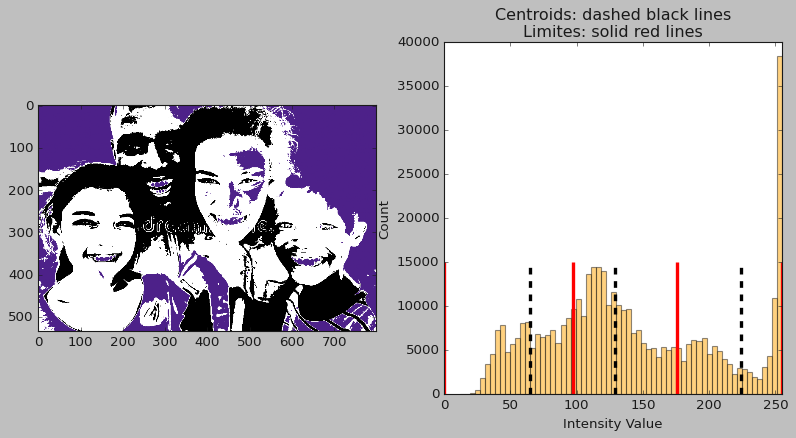

Número de clusters: 4 
Tamanho da imagem: 426400 
Tempo médio por iteração (std): 1.13084477186203 ( 0.002505859288960786 )
Variabilidade: 0.0022159180033477803 
Iterações (std): 18.0 ( 0.0 )
Cluster 0 limites 12.0 : 88.0
Cluster 1 limites 89.0 : 148.0
Cluster 2 limites 149.0 : 212.0
Cluster 3 limites 213.0 : 255.0


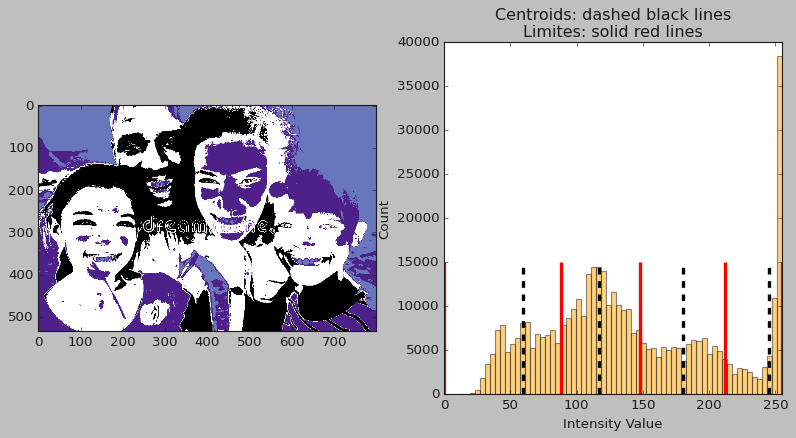



IMAGEM NÚMERO 2 :


Número de clusters: 2 
Tamanho da imagem: 226632 
Tempo médio por iteração (std): 0.35932192537519664 ( 0.0017564285532085404 )
Variabilidade: 0.004888175280076531 
Iterações (std): 9.0 ( 0.0 )
Cluster 0 limites 4.0 : 158.0
Cluster 1 limites 159.0 : 255.0


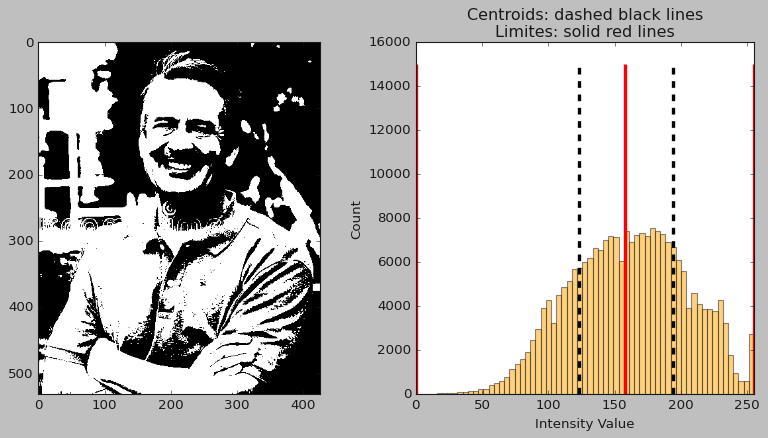

Número de clusters: 3 
Tamanho da imagem: 226632 
Tempo médio por iteração (std): 0.48516197204589834 ( 0.004798430616826243 )
Variabilidade: 0.009890368357997134 
Iterações (std): 15.0 ( 0.0 )
Cluster 0 limites 4.0 : 131.0
Cluster 1 limites 132.0 : 182.0
Cluster 2 limites 183.0 : 255.0


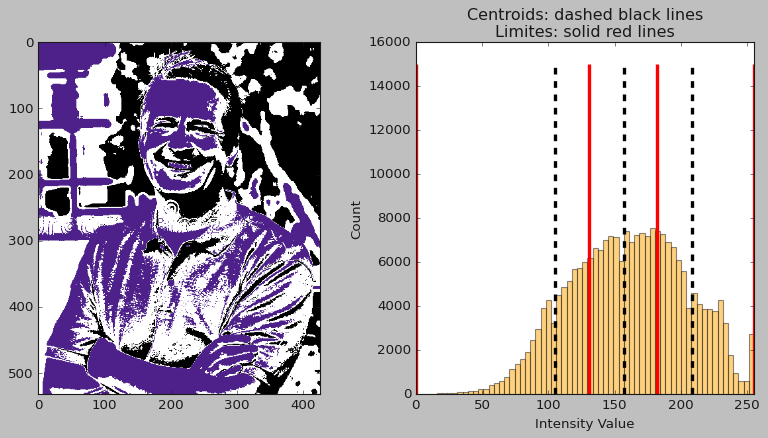

Número de clusters: 4 
Tamanho da imagem: 226632 
Tempo médio por iteração (std): 0.5944050457742479 ( 0.0037533472078993997 )
Variabilidade: 0.006314460542659832 
Iterações (std): 18.0 ( 0.0 )
Cluster 0 limites 4.0 : 113.0
Cluster 1 limites 114.0 : 153.0
Cluster 2 limites 154.0 : 194.0
Cluster 3 limites 195.0 : 255.0


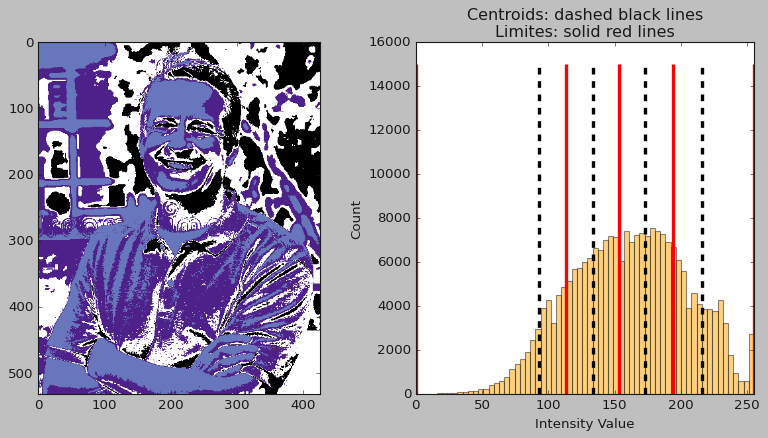



IMAGEM NÚMERO 3 :


Número de clusters: 2 
Tamanho da imagem: 328608 
Tempo médio por iteração (std): 0.5202662030855814 ( 0.008580056320888926 )
Variabilidade: 0.016491665747270436 
Iterações (std): 6.0 ( 0.0 )
Cluster 0 limites 1.0 : 106.0
Cluster 1 limites 107.0 : 252.0


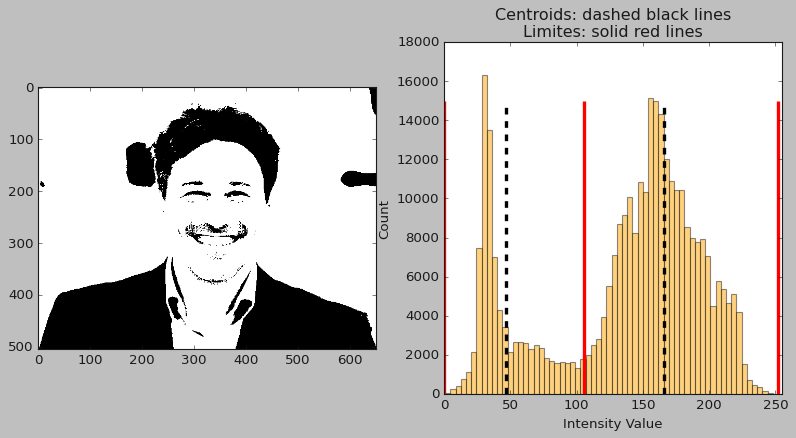

Número de clusters: 3 
Tamanho da imagem: 328608 
Tempo médio por iteração (std): 0.6829593849182128 ( 0.005575520965428522 )
Variabilidade: 0.008163766526315784 
Iterações (std): 5.0 ( 0.0 )
Cluster 0 limites 1.0 : 93.0
Cluster 1 limites 94.0 : 167.0
Cluster 2 limites 168.0 : 252.0


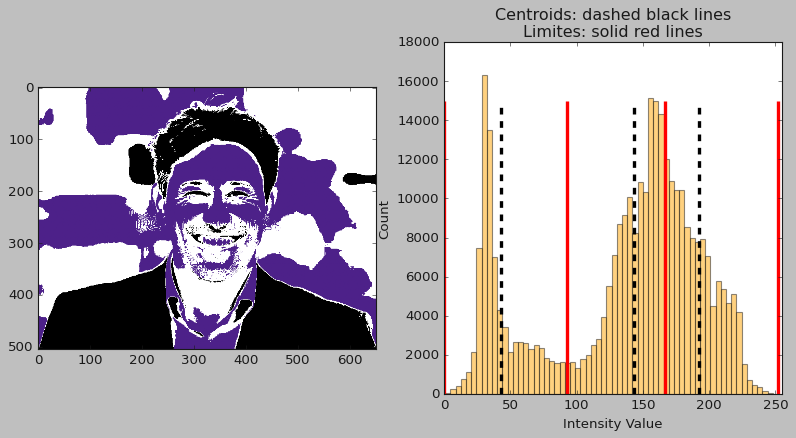

Número de clusters: 4 
Tamanho da imagem: 328608 
Tempo médio por iteração (std): 0.8587894490786961 ( 0.003395444272251017 )
Variabilidade: 0.0039537563903394805 
Iterações (std): 14.0 ( 0.0 )
Cluster 0 limites 1.0 : 79.0
Cluster 1 limites 80.0 : 138.0
Cluster 2 limites 139.0 : 178.0
Cluster 3 limites 179.0 : 252.0


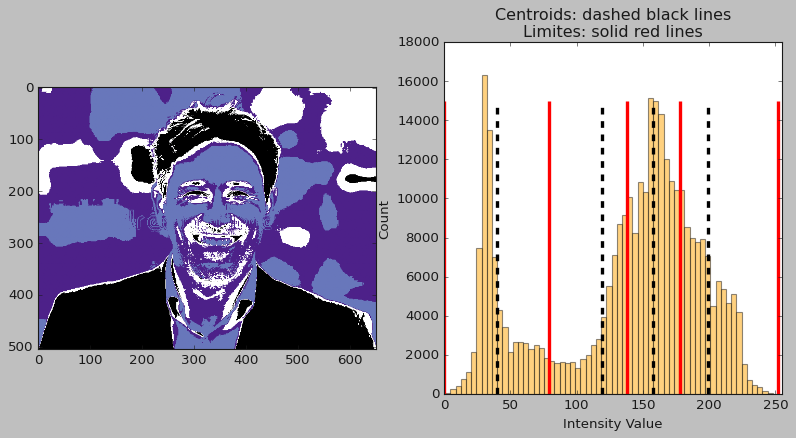



IMAGEM NÚMERO 4 :


Número de clusters: 2 
Tamanho da imagem: 316050 
Tempo médio por iteração (std): 0.49484955072402953 ( 0.004084837862906508 )
Variabilidade: 0.008254706621295013 
Iterações (std): 6.0 ( 0.0 )
Cluster 0 limites 0.0 : 110.0
Cluster 1 limites 111.0 : 254.0


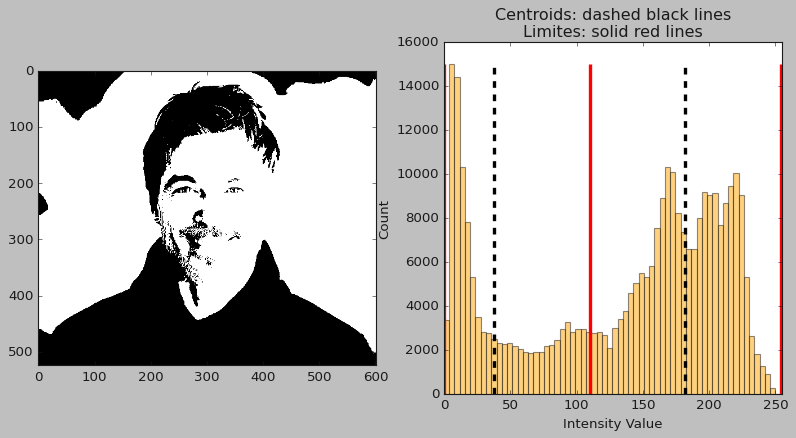

Número de clusters: 3 
Tamanho da imagem: 316050 
Tempo médio por iteração (std): 0.6639216423034668 ( 0.00521181674382562 )
Variabilidade: 0.00785004797515456 
Iterações (std): 9.0 ( 0.0 )
Cluster 0 limites 0.0 : 75.0
Cluster 1 limites 76.0 : 163.0
Cluster 2 limites 164.0 : 254.0


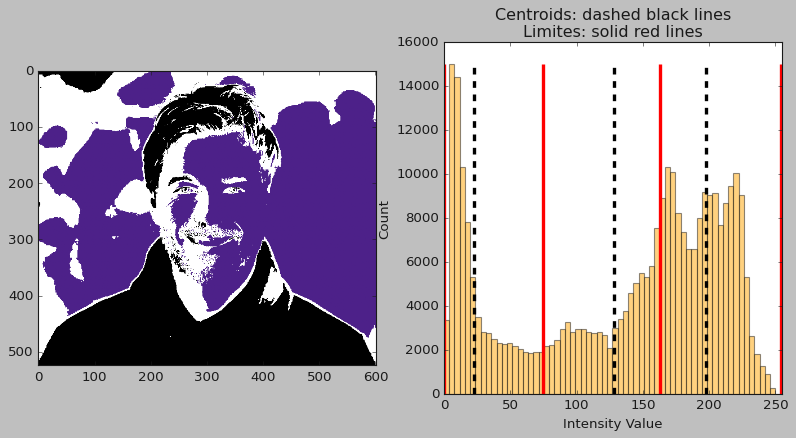

Número de clusters: 4 
Tamanho da imagem: 316050 
Tempo médio por iteração (std): 0.7875758647918701 ( 0.005235687375453215 )
Variabilidade: 0.006647851476297882 
Iterações (std): 4.0 ( 0.0 )
Cluster 0 limites 0.0 : 57.0
Cluster 1 limites 58.0 : 129.0
Cluster 2 limites 130.0 : 186.0
Cluster 3 limites 187.0 : 254.0


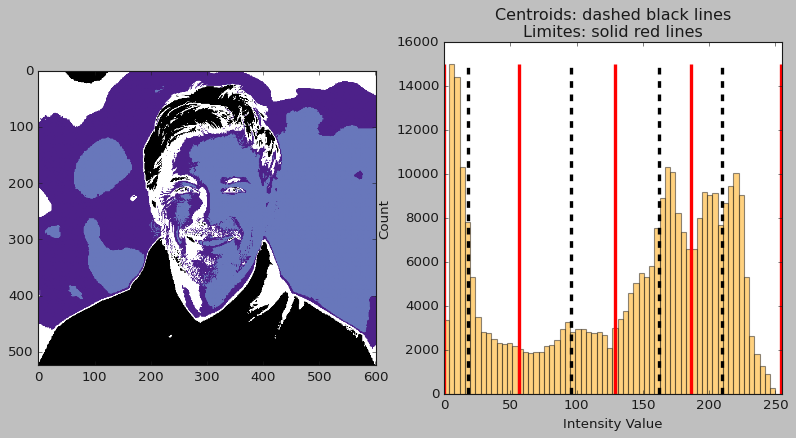



IMAGEM NÚMERO 5 :


Número de clusters: 2 
Tamanho da imagem: 225432 
Tempo médio por iteração (std): 0.3413996601104736 ( 0.0008988548820597946 )
Variabilidade: 0.002632852305034322 
Iterações (std): 5.0 ( 0.0 )
Cluster 0 limites 0.0 : 143.0
Cluster 1 limites 144.0 : 255.0


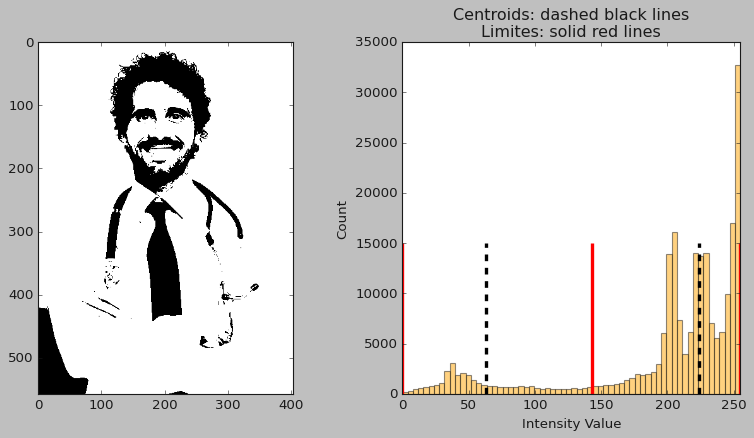

Número de clusters: 3 
Tamanho da imagem: 225432 
Tempo médio por iteração (std): 0.4776413889492259 ( 0.002172155490472968 )
Variabilidade: 0.004547670157419863 
Iterações (std): 17.0 ( 0.0 )
Cluster 0 limites 0.0 : 125.0
Cluster 1 limites 126.0 : 216.0
Cluster 2 limites 217.0 : 255.0


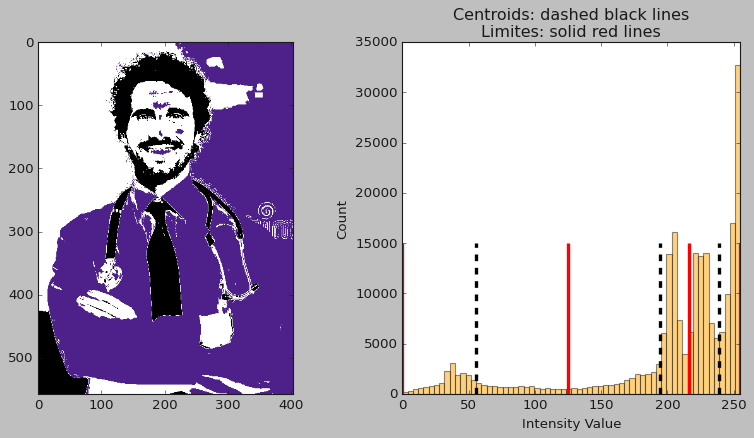

Número de clusters: 4 
Tamanho da imagem: 225432 
Tempo médio por iteração (std): 0.5794302701950074 ( 0.003007133718758217 )
Variabilidade: 0.005189811222230702 
Iterações (std): 13.0 ( 0.0 )
Cluster 0 limites 0.0 : 83.0
Cluster 1 limites 84.0 : 162.0
Cluster 2 limites 163.0 : 220.0
Cluster 3 limites 221.0 : 255.0


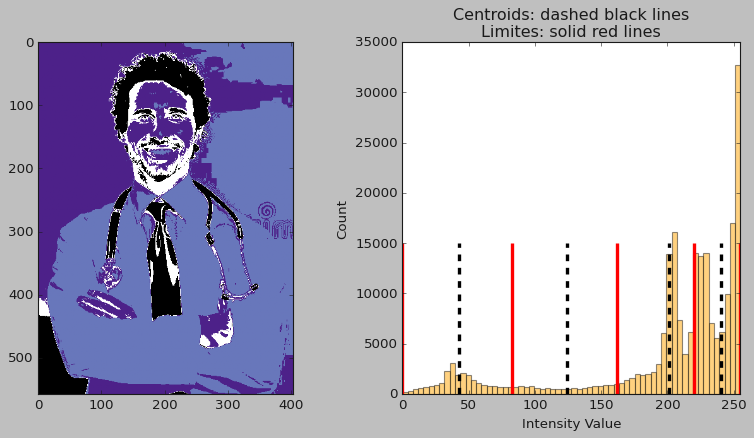



IMAGEM NÚMERO 6 :


Número de clusters: 2 
Tamanho da imagem: 312390 
Tempo médio por iteração (std): 0.4821995878219605 ( 0.00534110947752063 )
Variabilidade: 0.011076553386629384 
Iterações (std): 5.0 ( 0.0 )
Cluster 0 limites 2.0 : 133.0
Cluster 1 limites 134.0 : 255.0


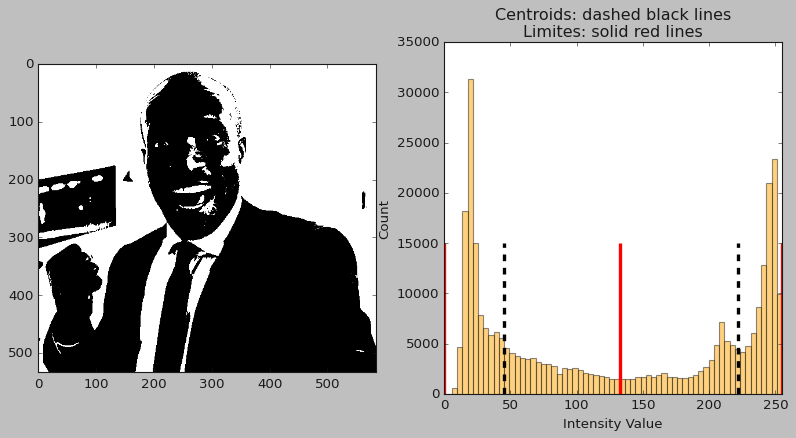

Número de clusters: 3 
Tamanho da imagem: 312390 
Tempo médio por iteração (std): 0.637374484539032 ( 0.006787145421882717 )
Variabilidade: 0.010648599193284902 
Iterações (std): 4.0 ( 0.0 )
Cluster 0 limites 2.0 : 77.0
Cluster 1 limites 78.0 : 177.0
Cluster 2 limites 178.0 : 255.0


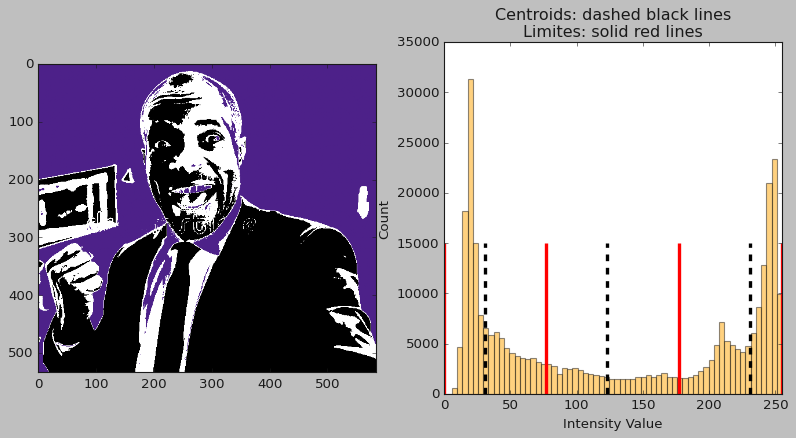

Número de clusters: 4 
Tamanho da imagem: 312390 
Tempo médio por iteração (std): 0.7919960975646974 ( 0.003489312869657425 )
Variabilidade: 0.004405719776128552 
Iterações (std): 6.0 ( 0.0 )
Cluster 0 limites 2.0 : 55.0
Cluster 1 limites 56.0 : 124.0
Cluster 2 limites 125.0 : 199.0
Cluster 3 limites 200.0 : 255.0


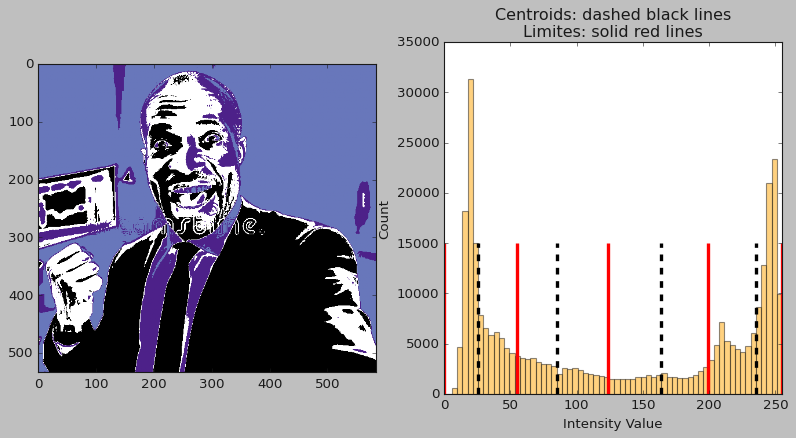

In [7]:
# Experimentos

plt.style.use('classic')

RODADAS_BENCHMARK = 10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

L = 256

lista_full = [] # Guarda o array de cada imagem (stats_per_image)

for i in range(nImg):

    stats_per_image = [] # Guarda três instâncias da classe Image_per_cluster()

    print("\n\nIMAGEM NÚMERO", i+1,":\n\n")

    #print("n     K     itTime (Std)     Variabilidade     Iterations (Std)")
    x = ResX[i]
    y = ResY[i]
    N = x*y

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):

        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            ItTime.append(IterTime)
            Iter.append(iterations)
        
        
        if np.std(Iter)>0:
            print("INSTABILIDADE NO CÓDIGO -  NUMERO DE ITERAÇÕES DIFERENTES NAS REPETIÇÕES COM K=",K)
        
        image_pk = Image_per_cluster(N, K, np.mean(ItTime), np.std(ItTime)/np.mean(ItTime), np.mean(Iter))
        
        print("Número de clusters:", K,"\nTamanho da imagem:",N, "\nTempo médio por iteração (std):", image_pk.t, '(', np.std(ItTime), ')\nVariabilidade:', image_pk.var, "\nIterações (std):", image_pk.iterations, '(', np.std(Iter), ')')

        
        stats_per_image.append(image_pk)

        # ordenando centroides das classes de menor para maior
        OrderOf = np.argsort(centros)[0]

        # calculando os limites das classes
        up = []
        dw = []
        for k in range(K):
            clsslst = np.argwhere(np.array(classe) == k)
            clsspxls = Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print("Cluster", k, "limites", dw[-1], ":", up[-1])

        # gerando a mascara com K cores segundo a classificação dos pixels
        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        # PLOT

        fig, ax = plt.subplots(1,2, figsize=(12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = 'orange', alpha = 0.5)
        ax[1].set_xlim(0, L-1)
        if ncolors[i]>1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C = centros
        ax[1].vlines(C,0,15000,linestyles='dashed',linewidths=3,colors='black') # centroides
        ax[1].vlines([0]+up,0,15000,linestyles='solid',linewidths=3,colors='red') # limites
        ax[1].set_xlabel('Intensity Value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('Centroids: dashed black lines\nLimites: solid red lines')

        plt.show()

    lista_full.append(stats_per_image)
    

# 6. Funções para plotar a regressão linear de acordo com o objetivo

In [108]:
# Calcular a regressão linear
def show_linear_time(n,t,T):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos (Exp)')
    plt.plot(n, line, color='red', label='Regressão Linear (Exp)')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear Exp (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})\n'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'time (exp) = {slope:.2g}n + {intercept:.2g}\n', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('time')
    plt.legend(loc="lower right")
    
    # Exibir o gráfico
    plt.show()

    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(n, T)
    line2 = slope2 * np.array(n) + intercept2
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared2 = r_value2 ** 2
    pearson_coeficiente2 = r_value2

    plt.scatter(n, T, label='Pontos (Teórico)')
    plt.plot(n, line2, color='purple', label='Regressão Linear (Teórico)')

    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear Teórica (R²={r_squared2:.2f}, Pearson={pearson_coeficiente2:.2f})\n'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'primitivas (teórico) = {slope2:.2g}n + {intercept:.2g}\n', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('primitivas')
    plt.legend(loc="lower right")
    
    # Exibir o gráfico
    plt.show()

# 7. Análise qualitativa dos tempos das primitivas

##### Após contar as primitivas de uma iteração do algoritmo de K-means, foi obtido a seguinte contagem:
##### FOCA_iteracao = [0, 5kn + 4k + 6n, 4kn + 4k + 4n + 1, 24kn + 16k + 34n + 10]

Funções: 0

Operações: 5kn + 4k + 6n

Comparações: 4kn + 4k + 4n + 1

Atribuições: 24kn + 16k + 34n + 10

Soma (O+C+A): 33kn + 24k + 44n + 11

##### Considerando que to, tc e ta = tmp (tempo médio das primitivas) temos que:

T = to * O + tc * C + ta * A =

T = tmp * (O+C+A)

##### Considerando tmp = 1:

T = 33kn + 24k + 44n + 11

In [109]:
#Função para calcular tempo teórico (qtd de primitivas) para cada par K,n
def calc_tTeorico(k,n):
    T = (33*k*n) + (24*k) + (44*n) + 11
    return T

>## 2 CLUSTERS

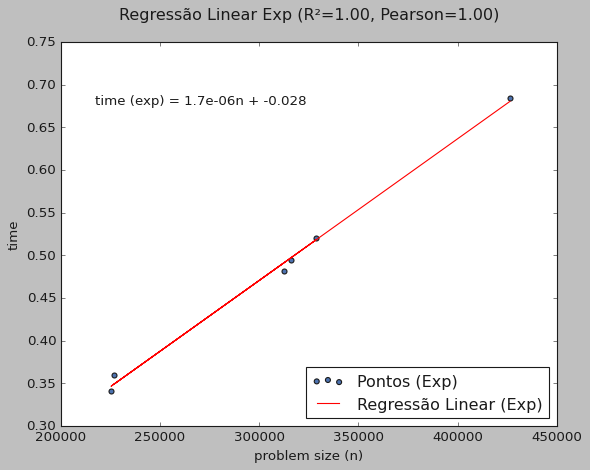

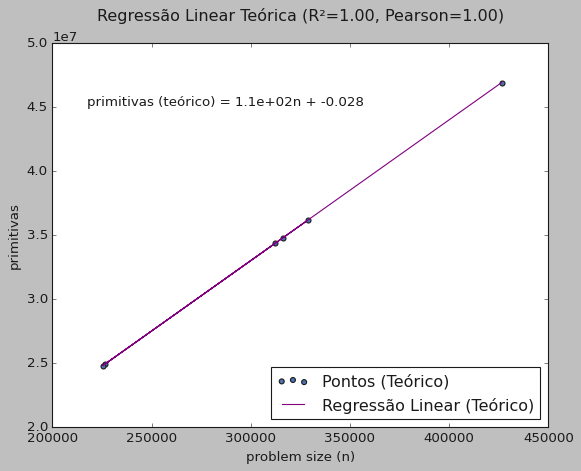

In [110]:
Q2 = [calc_tTeorico(2, image[0].n) for image in lista_full]

n = [image[0].n for image in lista_full]
t2 = [image[0].t for image in lista_full]
show_linear_time(n,t2,Q2)

>## 3 CLUSTERS

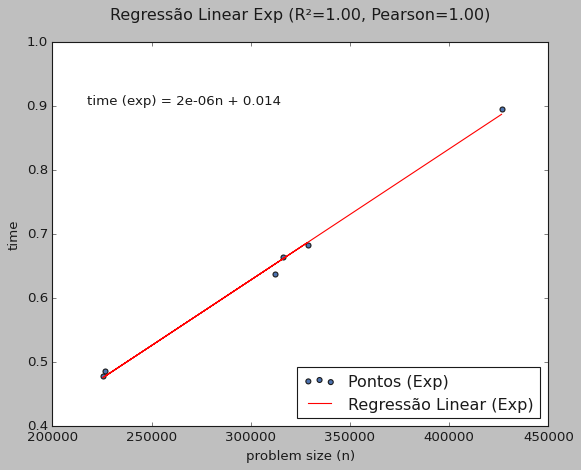

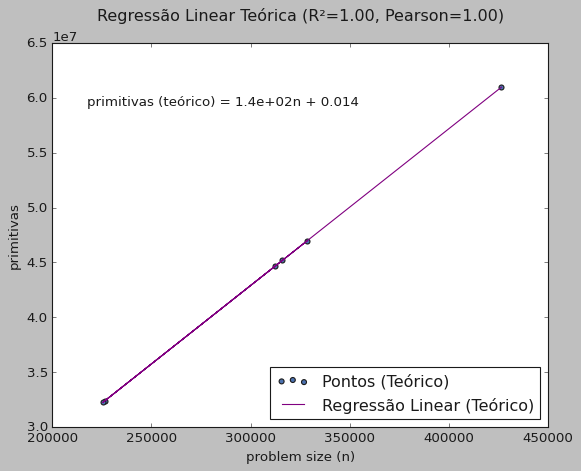

In [111]:
Q3 = [calc_tTeorico(3, image[1].n) for image in lista_full]

n = [image[1].n for image in lista_full]
t3 = [image[1].t for image in lista_full]
show_linear_time(n,t3,Q3)

>## 4 CLUSTERS

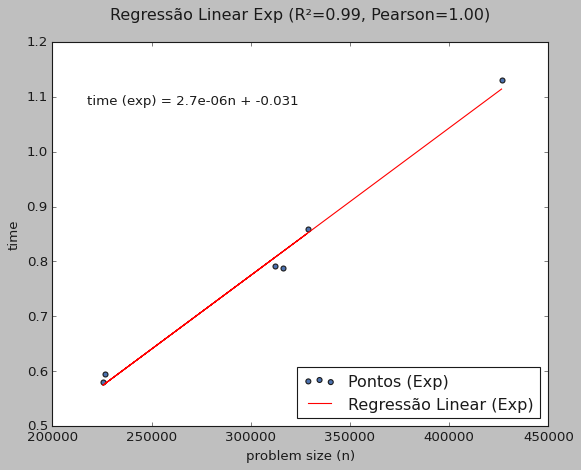

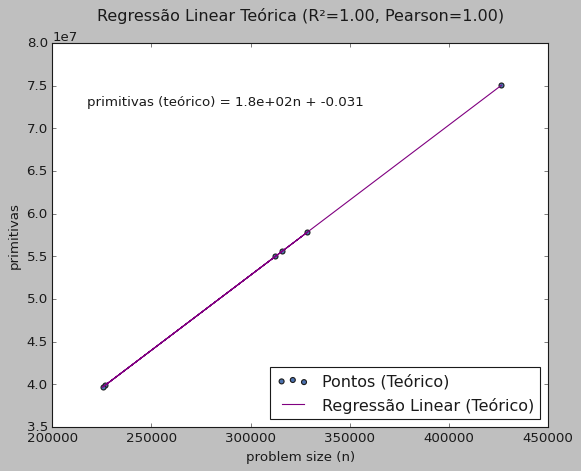

In [112]:
Q4 = [calc_tTeorico(4, image[2].n) for image in lista_full]

n = [image[2].n for image in lista_full]
t4 = [image[2].t for image in lista_full]
show_linear_time(n,t4,Q4)

## Percebemos que as curvas da análise experimental e teórica são retas para todos K clusters, sendo de complexidade O(Kn)

# 8. Análise quantitativa dos tempos das primitivas

##### Para obter o tempo por primitiva para cada par (K,n) devemos dividir o tempo experimental deste par pela quantidade de primitivas deste par
##### Na seção anterior foram capturados as qtd de primitivas e tempo experimental para cada n por numero de clusters (Q2 e t2, Q3 e t3, Q4 e t4)

In [122]:
# 2 clusters
tempos_2k = []
for i in range(len(t2)):
    tempo = t2[i]/Q2[i]
    tempos_2k.append(tempo)

# 3 clusters
tempos_3k = []
for i in range(len(t3)):
    tempo = t3[i]/Q3[i]
    tempos_3k.append(tempo)

# 4 clusters
tempos_4k = []
for i in range(len(t4)):
    tempo = t4[i]/Q4[i]
    tempos_4k.append(tempo)

print(tempos_primitivas)

# Agora temos todos os tempos por primitiva para cada par. Para acessar a imagem 2 com 4 clusters, por exemplo, fazemos assim:
tempos_primitivas[2][1] # o array de 4 clusters é o de indice 2 e a segunda imagem tem indice 1 nesse array

[[1.4584279046725272e-08, 1.4413477474898258e-08, 1.4393091572306616e-08, 1.423390173947813e-08, 1.3767459319737367e-08, 1.403253974205075e-08], [1.467062467814144e-08, 1.4970226509254833e-08, 1.453382546668352e-08, 1.4690081192931716e-08, 1.4816623075753935e-08, 1.4267921336037527e-08], [1.506858636154818e-08, 1.4902098276704996e-08, 1.4848927836984436e-08, 1.4158690904271897e-08, 1.4603998392963776e-08, 1.4404971572406925e-08]]


1.4902098276704996e-08

### Agora que achamos os tempos por primitiva para cada par, podemos achar o tempo médio de uma primitiva (tmp), pois consideramos anteriormente que to, tc e ta eram iguais a tmp.

In [114]:
tempos_primitivas_flat = np.array(tempos_primitivas)
tempos_primitivas_flat = tempos_primitivas_flat.flatten()

tmp = np.mean(tempos_primitivas_flat)
sd = np.std(tempos_primitivas_flat)
var = sd/tmp

print("Tempo médio de primitiva:", tmp, "\nDesvio padrão:", sd, "\nVariabilidade:", var)

Tempo médio de primitiva: 1.4520073583271088e-08 
Desvio padrão: 3.3577292200980275e-10 
Variabilidade: 0.023124739698058727


### Tendo variabilidade < 0.15, podemos refazer o cálculo de tempo utilizando a fórmula 'T = tmp * (O+C+A)' agora conhecendo tmp e comparar com o tempo experimental

In [115]:
#Função para calcular tempo teórico para cada par K,n
def calc_tempo_Teorico(k,n,tmp):
    T = tmp * ((33*k*n) + (24*k) + (44*n) + 11)
    return T

In [117]:
# Calcular a regressão linear
def show_linear_time_2(n,t,T):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value

    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(n, T)
    line2 = slope2 * np.array(n) + intercept2
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared2 = r_value2 ** 2
    pearson_coeficiente2 = r_value2
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, color='green', label='Pontos (Exp)')
    plt.plot(n, line, color='red', label='Regressão Linear (Exp)')

    plt.scatter(n, T, color='blue', label='Pontos (Teórico)')
    plt.plot(n, line2, color='purple', label='Regressão Linear (Teórico)')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear Exp (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})\nRegressão Linear Teórica (R²={r_squared2:.2f}, Pearson={pearson_coeficiente2:.2f})\n'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'time (exp) = {slope:.2g}n + {intercept:.2g}\ntime (teórico) = {slope2:.2g}n + {intercept:.2g}\n', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('time')
    plt.legend(loc="lower right")  
    
    # Exibir o gráfico
    plt.show()

>## 2 CLUSTERS

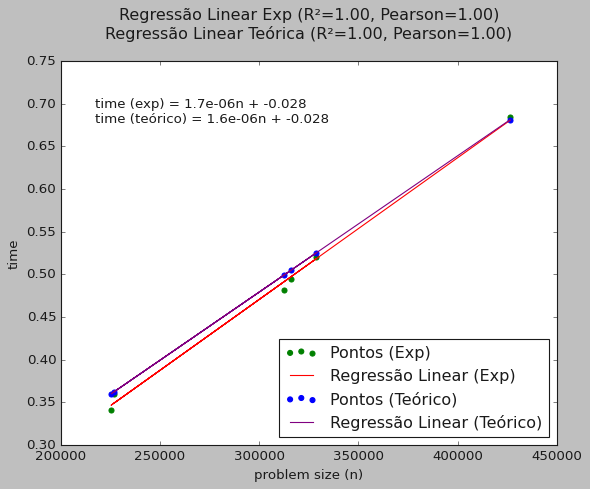

In [123]:
T2 = [calc_tempo_Teorico(2, image[0].n, tmp) for image in lista_full]

n = [image[0].n for image in lista_full]
show_linear_time_2(n,t2,T2)

>## 3 CLUSTERS

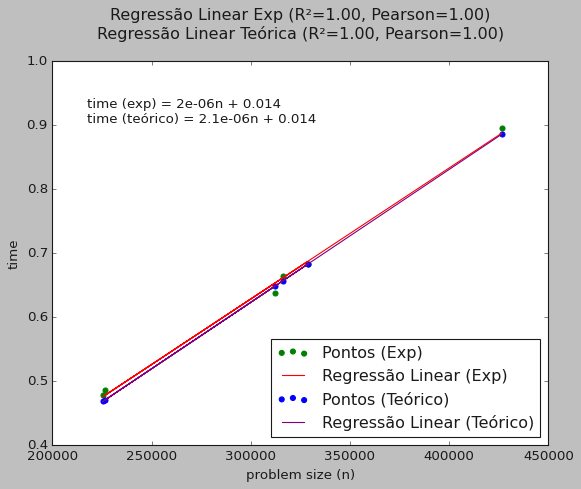

In [124]:
T3 = [calc_tempo_Teorico(3, image[1].n, tmp) for image in lista_full]

n = [image[1].n for image in lista_full]
show_linear_time_2(n,t3,T3)

>## 4 CLUSTERS

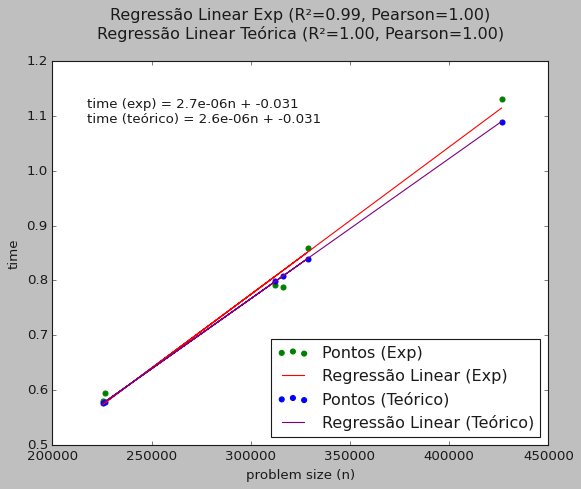

In [125]:
T4 = [calc_tempo_Teorico(4, image[2].n, tmp) for image in lista_full]

n = [image[2].n for image in lista_full]
show_linear_time_2(n,t4,T4)

# 9. Conclusão

Levando em consideração que as retas de tempos experimentais e teóricos ficaram extremamente parecidas e com R^2 = 1 e Pearson = 1, além da variabilidade dos tempos por primitivas ter sido < 0.15, podemos concluir que as primitivas tem tempos bem similares. Consideramos inicialmente que o tempo das primitivas (tc, to e ta) eram iguais, caso a reta do tempo teórico tivesse ficado muito diferente da experimental, a consideração inicial estaria errada. Como as retas são similares, tc, to e ta também podem ser considerados similares, ou seja, tem valores muito próximos, tendo uma diferença quase desconsiderável.

Por meio desta análise, podemos estimar o tempo gasto por uma iteração do algoritmo K-means para qualquer tamanho de entrada (n) e número de clusters (K).